<a href="https://colab.research.google.com/github/haneelkumar7/spotify/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.1/241.1 kB 6.4 MB/s eta 0:00:00


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id="02e6819c8e9b468392f79929dbf6738f", client_secret="718e6aa02b7b4bdebf2f3f8044caf249")
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2023', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])

In [4]:
import pandas as pd
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head(10)

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Luke Combs,Fast Car,1Lo0QY9cvc8sUB2vnIOxDT,92,718COspgdWOnwOFpJHRZHS
1,Eslabon Armado,Ella Baila Sola,3dnP0JxCgygwQH9Gm7q7nb,98,0XeEobZplHxzM9QzFQWLiR
2,Grupo Frontera,un x100to,6pD0ufEQq0xdHSsRbg9LBK,99,6XkjpgcEsYab502Vr1bBeW
3,Morgan Wallen,Last Night,59uQI0PADDKeE6UZDTJEe8,91,4oUHIQIBe0LHzYfvXNW4QM
4,Morgan Wallen,Last Night,7K3BhSpAxZBznislvUMVtn,90,4oUHIQIBe0LHzYfvXNW4QM
5,Yng Lvcas,La Bebe - Remix,2UW7JaomAMuX9pZrjVpHAU,99,1NNRWkhwmcXRimFYSBpB1y
6,PinkPantheress,Boy's a Liar Pt. 2,6AQbmUe0Qwf5PZnt4HmTXv,95,78rUTD7y6Cy67W1RVzYs7t
7,Bad Bunny,WHERE SHE GOES,7ro0hRteUMfnOioTFI5TG1,100,4q3ewBCX7sLwd24euuV69X
8,Olivia Rodrigo,vampire,3k79jB4aGmMDUQzEwa46Rz,96,1McMsnEElThX1knmY4oliG
9,FIFTY FIFTY,Cupid - Twin Ver.,7FbrGaHYVDmfr7KoLIZnQ7,98,4GJ6xDCF5jaUqD6avOuQT6


In [5]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

In [6]:

track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head(50)

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Luke Combs,Fast Car,1Lo0QY9cvc8sUB2vnIOxDT,92,718COspgdWOnwOFpJHRZHS,84,"[contemporary country, country]",8797763
1,Eslabon Armado,Ella Baila Sola,3dnP0JxCgygwQH9Gm7q7nb,98,0XeEobZplHxzM9QzFQWLiR,83,"[corrido, corridos tumbados, sad sierreno, sie...",4336278
2,Grupo Frontera,un x100to,6pD0ufEQq0xdHSsRbg9LBK,99,6XkjpgcEsYab502Vr1bBeW,85,[musica chihuahuense],1236839
3,Morgan Wallen,Last Night,59uQI0PADDKeE6UZDTJEe8,91,4oUHIQIBe0LHzYfvXNW4QM,88,[contemporary country],6408352
4,Morgan Wallen,Last Night,7K3BhSpAxZBznislvUMVtn,90,4oUHIQIBe0LHzYfvXNW4QM,88,[contemporary country],6408352
5,Yng Lvcas,La Bebe - Remix,2UW7JaomAMuX9pZrjVpHAU,99,1NNRWkhwmcXRimFYSBpB1y,78,[reggaeton],134610
6,PinkPantheress,Boy's a Liar Pt. 2,6AQbmUe0Qwf5PZnt4HmTXv,95,78rUTD7y6Cy67W1RVzYs7t,77,[bedroom pop],2182358
7,Bad Bunny,WHERE SHE GOES,7ro0hRteUMfnOioTFI5TG1,100,4q3ewBCX7sLwd24euuV69X,95,"[reggaeton, trap latino, urbano latino]",71314351
8,Olivia Rodrigo,vampire,3k79jB4aGmMDUQzEwa46Rz,96,1McMsnEElThX1knmY4oliG,84,[pop],26190869
9,FIFTY FIFTY,Cupid - Twin Ver.,7FbrGaHYVDmfr7KoLIZnQ7,98,4GJ6xDCF5jaUqD6avOuQT6,78,[k-pop girl group],992575


In [7]:
track_features = []
for t_id in track_df['track_id']:
  af = sp.audio_features(t_id)
  track_features.append(af)
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index=True)
tf_df.head()

<ipython-input-7-340c9660ab86>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
<ipython-input-7-340c9660ab86>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
<ipython-input-7-340c9660ab86>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
<ipython-input-7-340c9660ab86>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
<ipython-input-7-340c9660ab86>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.712,0.603,8,-5.520,1,0.0262,0.186,0,0.1150,0.670,97.994,audio_features,1Lo0QY9cvc8sUB2vnIOxDT,spotify:track:1Lo0QY9cvc8sUB2vnIOxDT,https://api.spotify.com/v1/tracks/1Lo0QY9cvc8s...,https://api.spotify.com/v1/audio-analysis/1Lo0...,265493,4
1,0.668,0.758,5,-5.176,0,0.0332,0.483,0.000019,0.0837,0.834,147.989,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3
2,0.569,0.724,6,-4.076,0,0.0474,0.228,0,0.2700,0.562,83.118,audio_features,6pD0ufEQq0xdHSsRbg9LBK,spotify:track:6pD0ufEQq0xdHSsRbg9LBK,https://api.spotify.com/v1/tracks/6pD0ufEQq0xd...,https://api.spotify.com/v1/audio-analysis/6pD0...,194563,4
3,0.517,0.675,6,-5.382,1,0.0357,0.459,0,0.1510,0.518,203.853,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4
4,0.492,0.675,6,-5.456,1,0.0389,0.467,0,0.1420,0.478,203.759,audio_features,7K3BhSpAxZBznislvUMVtn,spotify:track:7K3BhSpAxZBznislvUMVtn,https://api.spotify.com/v1/tracks/7K3BhSpAxZBz...,https://api.spotify.com/v1/audio-analysis/7K3B...,163855,4


In [8]:
cols_to_drop2 = ['key','mode','type', 'uri','track_href','analysis_url']
tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1000 non-null   float64
 1   energy            1000 non-null   float64
 2   loudness          1000 non-null   float64
 3   speechiness       1000 

In [9]:
track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      1000 non-null   float64 
 1   energy            1000 non-null   float64 
 2   loudness          1000 non-null   float64 
 3   speechi

In [10]:
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)


,track_name,artist_name
7,WHERE SHE GOES,Bad Bunny
2,un x100to,Grupo Frontera
5,La Bebe - Remix,Yng Lvcas
1,Ella Baila Sola,Eslabon Armado
17,Daylight,David Kushner
9,Cupid - Twin Ver.,FIFTY FIFTY
49,Classy 101,Feid
24,Flowers,Miley Cyrus
21,"Peso Pluma: Bzrp Music Sessions, Vol. 55",Bizarrap
22,Like Crazy,Jimin


In [11]:
by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)

,artist_followers,artist_popularity,artist_name,artist_genres
915,113349444,89,Ed Sheeran,"['pop', 'singer-songwriter pop', 'uk pop']"
954,82915519,88,Arijit Singh,"['filmi', 'modern bollywood']"
180,82754337,86,Billie Eilish,"['art pop', 'electropop', 'pop']"
114,79144768,100,Taylor Swift,['pop']
11,77072871,94,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
7,71314351,95,Bad Bunny,"['reggaeton', 'trap latino', 'urbano latino']"
449,67616415,94,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."
68,66983727,89,BTS,"['k-pop', 'k-pop boy group', 'pop']"
768,42208031,84,XXXTENTACION,"['emo rap', 'miami hip hop']"
776,41947674,82,Shawn Mendes,"['canadian pop', 'pop', 'viral pop']"


In [12]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)

pop                      228
rap                      202
trap                     159
melodic rap              123
singer-songwriter pop    107
urbano latino             93
trap latino               91
uk pop                    81
contemporary country      77
rage rap                  68
philly rap                61
hip hop                   58
atl hip hop               55
reggaeton colombiano      52
reggaeton                 51
sad sierreno              51
colombian pop             41
k-pop                     37
pop reggaeton             36
modern country pop        36
dtype: int64

Text(0.5, 1.0, 'Top genres')

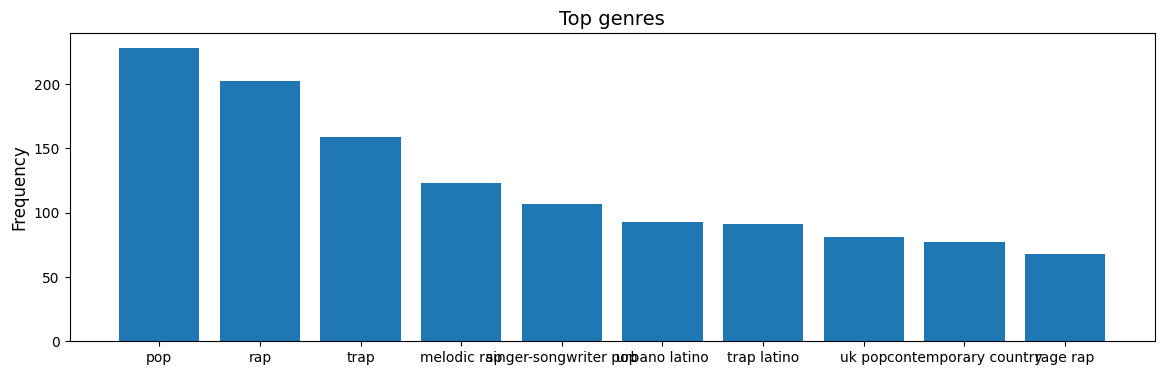

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
        to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)

In [14]:
top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_10_genres:
  for index, row in by_art_fol.iterrows():
    if genre in row['artist_genres']:
      top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Ed Sheeran,pop
1,Drake,rap
2,Lil Uzi Vert,trap
3,Post Malone,melodic rap
4,Ed Sheeran,singer-songwriter pop
5,Bad Bunny,urbano latino
6,Bad Bunny,trap latino
7,Ed Sheeran,uk pop
8,Luke Combs,contemporary country
9,Lil Uzi Vert,rage rap


In [15]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending=False)[['track_popularity','track_name', 'artist_name','artist_genres', 'track_id']])
by_track_pop.astype(str).drop_duplicates().head(20)
top_songs_by_genre = []
for genre in top_10_genres:
  for index, row in by_track_pop.iterrows():
    if genre in row['artist_genres']:
      top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,Flowers,97,Miley Cyrus,pop
1,Calling (Spider-Man: Across the Spider-Verse) ...,94,Metro Boomin,rap
2,fukumean,92,Gunna,trap
3,fukumean,92,Gunna,melodic rap
4,Daylight,98,David Kushner,singer-songwriter pop
5,WHERE SHE GOES,100,Bad Bunny,urbano latino
6,WHERE SHE GOES,100,Bad Bunny,trap latino
7,Dance The Night (From Barbie The Album),94,Dua Lipa,uk pop
8,Fast Car,92,Luke Combs,contemporary country
9,Watch This - ARIZONATEARS Pluggnb Remix,89,Lil Uzi Vert,rage rap


<ipython-input-16-27f84aca68cc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(tf_df.corr(), annot=True)


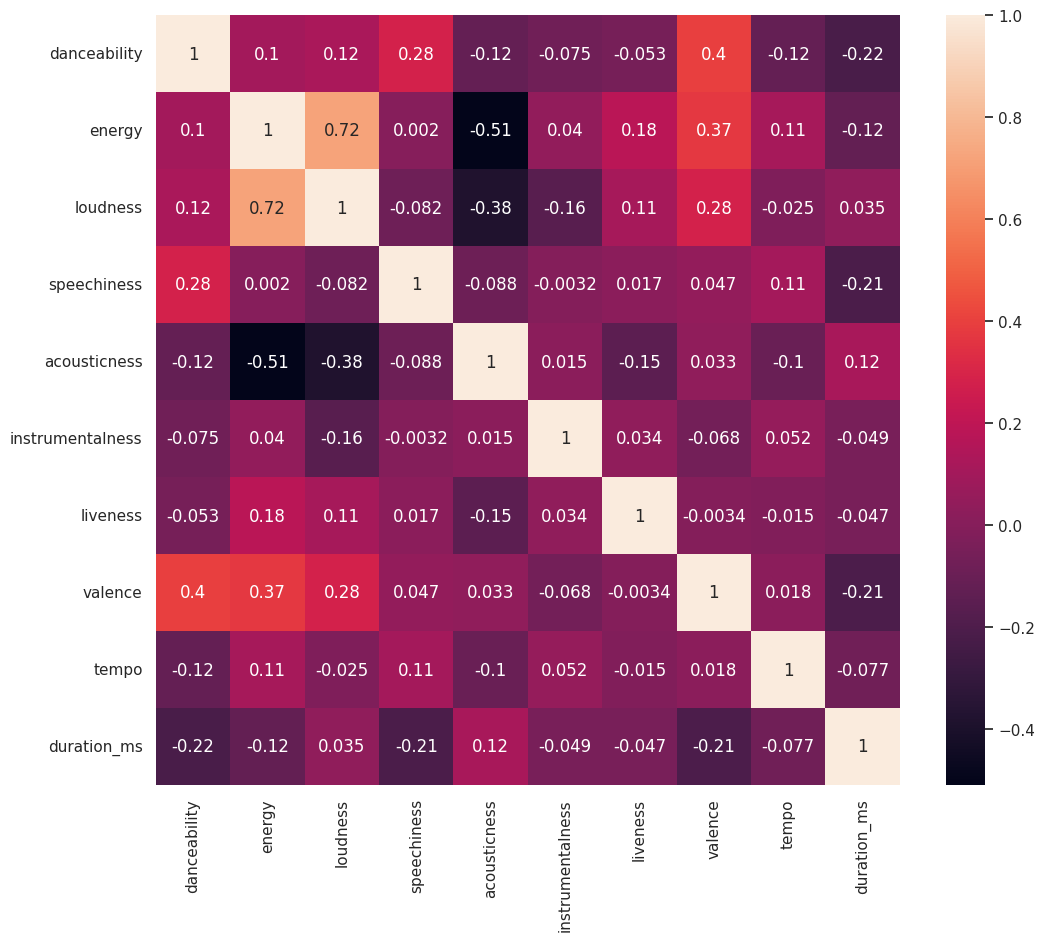

In [16]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(tf_df.corr(), annot=True)
plt.show()

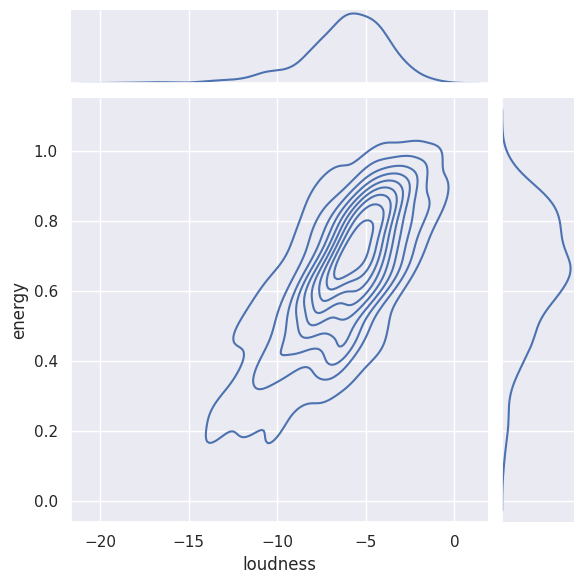

In [17]:

sn.set(rc = {'figure.figsize':(20,20)})
sn.jointplot(data=tf_df, x="loudness", y="energy", kind="kde")

In [18]:

feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_feat = pd.DataFrame(columns=feat_cols)
for i, track in by_track_pop[:100].iterrows():
  features = tf_df[tf_df['id'] == track['track_id']]
  top_100_feat = top_100_feat.append(features, ignore_index=True)
top_100_feat = top_100_feat[feat_cols]

from sklearn import preprocessing
mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(top_100_feat.mean(), ignore_index=True)
mean_vals = mean_vals.append(tf_df[feat_cols].mean(), ignore_index=True)
print(mean_vals)

import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top 100'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()

<ipython-input-18-4adc88eb19d5>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_100_feat = top_100_feat.append(features, ignore_index=True)
<ipython-input-18-4adc88eb19d5>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_100_feat = top_100_feat.append(features, ignore_index=True)
<ipython-input-18-4adc88eb19d5>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_100_feat = top_100_feat.append(features, ignore_index=True)
<ipython-input-18-4adc88eb19d5>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_100_feat = top_100_feat.append(features, ignore_index=True)
<ipython-input-18-4adc88eb19d5>:5: FutureWarning: The frame.appe

   danceability    energy  speechiness  acousticness  instrumentalness  \
0      0.707470  0.681220     0.093810      0.247610          0.020320   
1      0.659122  0.656743     0.105411      0.219779          0.020533   

   liveness   valence  
0  0.175732  0.579122  
1  0.179840  0.493769  


<ipython-input-18-4adc88eb19d5>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_vals = mean_vals.append(top_100_feat.mean(), ignore_index=True)
<ipython-input-18-4adc88eb19d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_vals = mean_vals.append(tf_df[feat_cols].mean(), ignore_index=True)


In [19]:
# https://blog.devgenius.io/spotify-data-analysis-with-python-a727542beaa7

In [20]:
rec = sp.recommendations(seed_artists=["6M2wZ9GZgrQXHCFfjv46we"], seed_genres=["pop"], seed_tracks=["1r9xUipOqoNwggBpENDsvJ"], limit=100)
for track in rec['tracks']:
  print(track['artists'][0]['name'], track['name'])

Lost Frequencies Are You With Me - Radio Edit
PNAU You Know What I Need
WALK THE MOON Ghostbusters
Taylor Swift The Man
Dua Lipa Don't Start Now - Regard Remix
Linkin Park One More Light - Steve Aoki Chester Forever Remix
KYLE iSpy (feat. Lil Yachty)
The Chainsmokers Closer
5 Seconds of Summer Easier - Seeb Remix
Twenty One Pilots Stressed Out
Beyoncé BREAK MY SOUL
The 1975 Girls
Regard Ride It
Lorde Perfect Places
Dua Lipa New Rules - SG Lewis Remix
Calvin Harris Potion (with Dua Lipa & Young Thug)
Conan Gray Overdrive
Sia The Greatest (feat. Kendrick Lamar)
Jonas Blue Rise
Imagine Dragons Younger
James Hersey Miss You
Taylor Swift You Need To Calm Down
DJ Snake You Know You Like It
Lost Frequencies The Feeling
Beyoncé CUFF IT
AJR Weak
Topic Breaking Me
The Chainsmokers Who Do You Love
Dua Lipa If It Ain’t Me
Marshmello Here With Me
Sean Paul No Lie
Kim Petras Future Starts Now
The Chainsmokers Paris - Jewelz & Sparks Remix
Arctic Monkeys Do I Wanna Know?
Britney Spears Matches
Maroon